In [3]:
from mplsoccer.pitch import Pitch, add_image
import pandas as pd
import numpy as np
import matplotlib.patheffects as path_effects
import time
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [6]:
#Veri okuma ve dataframe oluşturma
url = ('https://fbref.com/en/share/BMUpB')
df = pd.read_html(url)[0]
df = df[['Unnamed: 0_level_0','Pressures']].copy()
df.columns = df.columns.droplevel()

In [7]:
df.head()

,Squad,Press,Succ,%,Def 3rd,Mid 3rd,Att 3rd
0,Alavés,3570,1021,28.6,1144,1631,795
1,Athletic Club,3225,932,28.9,919,1431,875
2,Atlético Madrid,3063,950,31.0,979,1370,714
3,Barcelona,3068,956,31.2,868,1394,806
4,Betis,3204,953,29.7,958,1566,680


In [11]:
pressure_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']  #Press Kolonları
df_total = pd.DataFrame(df[pressure_cols].sum())   #Kolon toplamları
df_total.columns = ['total']                       #total tanımlama
df_total = df_total.T                              #Terse çevirme 
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100
df_total.head()

,Def 3rd,Mid 3rd,Att 3rd
total,31.850001,45.803664,22.346335


In [12]:
df[pressure_cols] = df[pressure_cols].divide(df[pressure_cols].sum(axis=1), axis=0) * 100.


In [15]:
df

,Squad,Press,Succ,%,Def 3rd,Mid 3rd,Att 3rd
0,Alavés,3570,1021,28.6,32.044818,45.686275,22.268908
1,Athletic Club,3225,932,28.9,28.496124,44.372093,27.131783
2,Atlético Madrid,3063,950,31.0,31.962129,44.727391,23.310480
3,Barcelona,3068,956,31.2,28.292047,45.436767,26.271186
4,Betis,3204,953,29.7,29.900125,48.876404,21.223471
5,Cádiz,3588,986,27.5,39.437012,43.756968,16.806020
6,Celta Vigo,3794,1125,29.7,32.235108,48.629415,19.135477
7,Eibar,3269,1054,32.2,26.460691,44.417253,29.122056
8,Elche,3128,909,29.1,41.879795,43.574169,14.546036
9,Getafe,3848,1110,28.8,27.027027,50.623701,22.349272


In [16]:
#Saha 
pitch = Pitch(line_zorder=2, line_color='black', figsize=(16, 9), layout=(4, 5),
              tight_layout=False, constrained_layout=True)

In [17]:
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

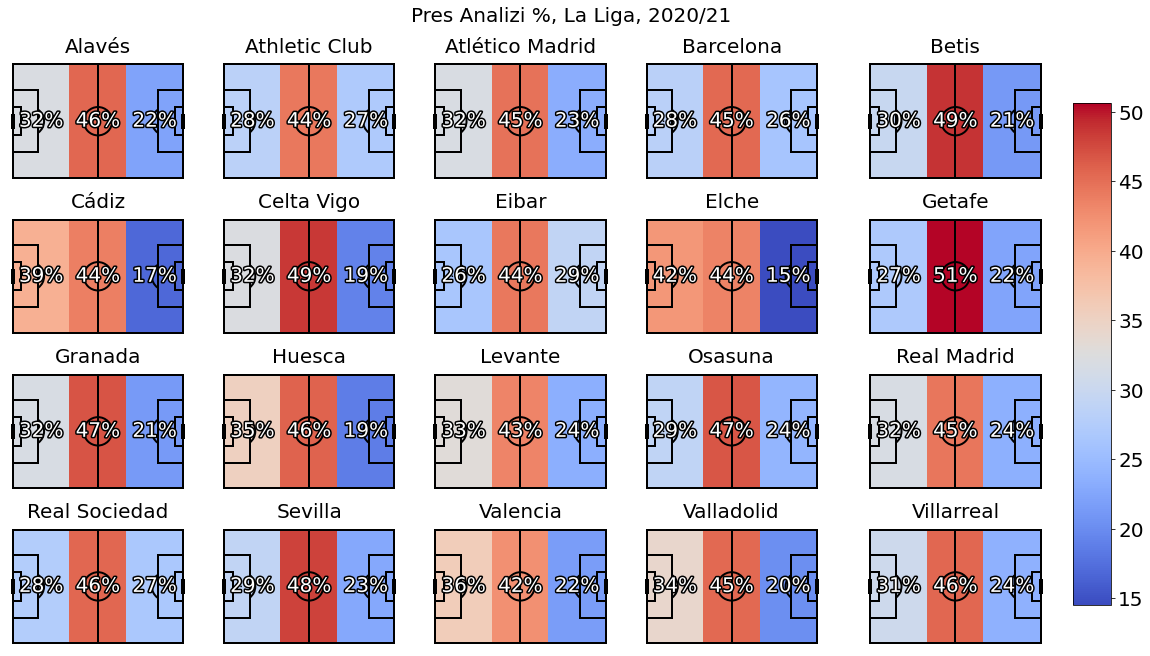

In [24]:
fig, axes = pitch.draw()
axes = axes.ravel()
teams = df['Squad'].values
vmin = df[pressure_cols].min().min()  #Isı haritasının min max değerleri
vmax = df[pressure_cols].max().max()
for i, ax in enumerate(axes[:len(teams)]):
    ax.set_title(teams[i], fontsize=20)
    # df bin istatistiklerini doldurma
    bin_statistic['statistic'] = df.loc[df.Squad == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)  #ısı haritası
    # çizim etiketleri
    bin_statistic['statistic'] = (pd.DataFrame(bin_statistic['statistic'])
                                  .round(0).astype(np.int32).applymap(lambda x: '{:d}%'.format(x)).values)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=20, ax=ax, ha='center', va='center')
    # siyah yol efekti 
    for label in annotate:
        label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
axes = axes.reshape(4, 5)
cbar = fig.colorbar(heatmap, ax=axes[:, 4], shrink=0.85)
cbar.ax.tick_params(labelsize=20)

if len(teams) == 18:
    for ax in axes[-1, 3:]:
        ax.remove()

title = fig.suptitle('Pres Analizi %, La Liga, 2020/21', fontsize=20)
plt.savefig('pressures.png')